<a href="https://colab.research.google.com/github/joydeep03564/Machine_Learning-/blob/master/distracted_driver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# Checking the GPU provided by google colab.Thank you google for proving the GPUs for Free.

!nvidia-smi


Sat Oct  9 10:09:09 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Problem Statement

Driver Distraction is very common phenomenon which cause accidents.[Distracted driving plays part in up to 25% of crashes](https://https://www.carinsurancequotes.com/articles/car-insurance-distracted-driving).

As per the WHO report, the total number of mortalities increases each year, and the most common cause is vehicle driver distraction. Recent study recently done by http://savelifefoundation.org/ recently published a study  [Distracted Driving in India](http://savelifefoundation.org/wp-content/uploads/2017/04/Distracted-Driving-in-India_A-Study-on-Mobile-Phone-Usage-Pattern-and-Behaviour.pdf
)
The major cause of driver distraction are usage of cell phones,texting while driving and also congintive behaviours  of the drivers. In this study, we are develping a algorithms which can detect the following behaviour. 

1. texting - right
2. talking on the phone - right
3. texting - left
4. talking on the phone - left
5. operating the radio
6. drinking
7. reaching behind
8. hair and makeup
9.  talking to co- passenger

##Posing the computer Vision Problem: 
This problem can posed as a supervised classification problem. We will use the [State Farm Distracted Driver Detection](https://www.kaggle.com/c/state-farm-distracted-driver-detection/data) data set from kaggle to train a computer vision algorithim which will detect the disctrated driving behaviour.Using CNN based architecture, we will try to detect the in apropriate behaviour of the drivers.
The Goals of the system will be to predict the likelihood of dirver's behaviour of the drivers given a driver's driving image.


### About the dataset: 

As discussed, I am going to use the State Farm Distracted Driver Detection from kaggle.
The link given below:

[dataset](https://www.kaggle.com/c/state-farm-distracted-driver-detection/data#)

The dataset contains images of different driving behaviour classified into the following categories:

The 10 classes to predict are:
c0: safe driving

c1: texting - right

c2: talking on the phone - right

c3: texting - left

c4: talking on the phone - left

c5: operating the radio

c6: drinking

c7: reaching behind

c8: hair and makeup

c9: talking to passenger

The aim of the system will be predicting the above mentioned activities of the driver.


###Creating a dataset:

I have downloaded the dataset into my google drive and fetching the training images from the google drive.

Loading the data, my training dataset is in the following folder
"/content/drive/MyDrive/Driver_distraction/imgs/train".

Now we have the data, the next step is to explore the images and understand the dataset. We will visualise the dataset and its each classes programatically.

# Project Outline: 
The following steps will be performed :

1. Loading the images of the training data

2. Understand the distribution of the each class

3. Visualising the dataset 

4. Build the model


 *   Create the base line model
*   Experiment with transfer learning 
*   Select the best model
*   Save the best performing model
*   Evaluating both models and its predictions of each class
*   Finding and visualing the results where our model went wrong

5.  Predict with custom data 



In [2]:
# importing the necessary libraries 
import numpy as np
import os
#import PIL
#import PIL.Image
import tensorflow as tf
#import tensorflow_datasets as tfds

In [3]:
# Creating the data directory path
import pathlib

data_dir="/content/drive/MyDrive/Driver_distraction/imgs/train"
data_dir = pathlib.Path(data_dir)

In [4]:
# How many images are there in the training folder 
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

22434


Exploring the folder Structure:

We will use os.walk for exploring the different folders and files within it.



In [5]:
import os

for dirpath,dirfolder,filenames in os.walk("/content/drive/MyDrive/Driver_distraction/imgs"):

  print(f"There are {len(dirfolder)} directories and {len(filenames)} files in the path{dirpath}")




There are 1 directories and 0 files in the path/content/drive/MyDrive/Driver_distraction/imgs
There are 10 directories and 0 files in the path/content/drive/MyDrive/Driver_distraction/imgs/train
There are 0 directories and 2326 files in the path/content/drive/MyDrive/Driver_distraction/imgs/train/c4
There are 0 directories and 2489 files in the path/content/drive/MyDrive/Driver_distraction/imgs/train/c0
There are 0 directories and 2002 files in the path/content/drive/MyDrive/Driver_distraction/imgs/train/c7
There are 0 directories and 2327 files in the path/content/drive/MyDrive/Driver_distraction/imgs/train/c2
There are 0 directories and 2267 files in the path/content/drive/MyDrive/Driver_distraction/imgs/train/c1
There are 0 directories and 2325 files in the path/content/drive/MyDrive/Driver_distraction/imgs/train/c6
There are 0 directories and 2346 files in the path/content/drive/MyDrive/Driver_distraction/imgs/train/c3
There are 0 directories and 2312 files in the path/content/driv

In [6]:
# We will check the structure manually
!ls /content/drive/MyDrive/Driver_distraction/imgs

train


In [7]:
!ls /content/drive/MyDrive/Driver_distraction/imgs/train

c0  c1	c2  c3	c4  c5	c6  c7	c8  c9


In [8]:
!ls /content/drive/MyDrive/Driver_distraction/imgs/train/c0

img_100026.jpg	img_27382.jpg  img_45107.jpg  img_63318.jpg  img_8122.jpg
img_10003.jpg	img_27394.jpg  img_45226.jpg  img_63345.jpg  img_81260.jpg
img_100050.jpg	img_27414.jpg  img_45238.jpg  img_63349.jpg  img_81279.jpg
img_100074.jpg	img_27453.jpg  img_45276.jpg  img_63389.jpg  img_8128.jpg
img_10012.jpg	img_27472.jpg  img_45290.jpg  img_63398.jpg  img_81332.jpg
img_100145.jpg	img_27480.jpg  img_45304.jpg  img_63414.jpg  img_81340.jpg
img_100191.jpg	img_27568.jpg  img_45373.jpg  img_63493.jpg  img_81350.jpg
img_100257.jpg	img_27618.jpg  img_45427.jpg  img_63590.jpg  img_81383.jpg
img_100312.jpg	img_2764.jpg   img_45462.jpg  img_63634.jpg  img_81396.jpg
img_100337.jpg	img_2765.jpg   img_45486.jpg  img_63775.jpg  img_81441.jpg
img_100456.jpg	img_27728.jpg  img_45499.jpg  img_63802.jpg  img_81502.jpg
img_10053.jpg	img_27760.jpg  img_45509.jpg  img_63812.jpg  img_81503.jpg
img_100542.jpg	img_27832.jpg  img_45554.jpg  img_63832.jpg  img_81517.jpg
img_100598.jpg	img_2785.jpg   img_45571.jpg

Now let us understand how many images each class has in the training dataset.



In [9]:
def file_count(directory_path):
  
  """
  This function will traverse through the directory and will return two list of folder name and number of files in each folders respectively"""


  class_label_list = []
  num_files = []

  for directory_path,dir_folder,filenames  in os.walk(directory_path):
     #print(directory_path)
     directory_path = directory_path.split('/')
     class_label= directory_path[-1]
     class_label_list.append(class_label)
     #print(dir_folder)
     num_files.append(len(filenames))
     #print(len(filenames))

  return class_label_list,num_files



file_count("/content/drive/MyDrive/Driver_distraction/imgs/train/")

(['', 'c4', 'c0', 'c7', 'c2', 'c1', 'c6', 'c3', 'c5', 'c8', 'c9'],
 [0, 2326, 2489, 2002, 2327, 2267, 2325, 2346, 2312, 1911, 2129])

In [10]:
class_label,number_file = file_count("/content/drive/MyDrive/Driver_distraction/imgs/train/")

In [11]:
# As os.walk traverse from root and we are not accounting the parent folder, we will use the list from index one
class_label = class_label[1:]
number_file = number_file[1:]

In [12]:
# The class_label and number of files are taken in two list
class_label,number_file

(['c4', 'c0', 'c7', 'c2', 'c1', 'c6', 'c3', 'c5', 'c8', 'c9'],
 [2326, 2489, 2002, 2327, 2267, 2325, 2346, 2312, 1911, 2129])

## Plotting the class distribution: 

In order to have better visualization, we will plot the bar plot of our class_labels and number of files in each of the classes.

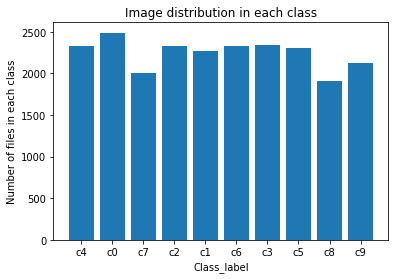

In [13]:
import matplotlib.pyplot as plt

plt.bar(class_label,number_file)
plt.xlabel("Class_label")
plt.ylabel("Number of files in each class")
plt.title("Image distribution in each class")
plt.show()

We can easily understand that there are 10 different folders as c0,c1,c2 etc and each represents a perticular class of images.


Note: To save on the compute storage, we are going to train and validate the model on the training dataset.


### Visualising the dataset for training 

We will create a function which will take the path of the target folder and class name and going to display the picture.
It will choose an image randomly, display that with shape




In [14]:
class_names = np.array([sorted([items.name for items in data_dir.glob("*")])])

class_names

array([['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']],
      dtype='<U2')

In [15]:
import random

import matplotlib.image as mpimg

# Setup the target directory from where we will load the image

def visualize_training_image(target_dir,target_class):

  """
  
  """

  target_folder = target_dir + target_class
# Getting the random image path
  random_images = random.sample(os.listdir(target_folder),1)
#read in the image and plot it using matplotlib

  img = mpimg.imread(target_folder + "/"+ random_images[0])

  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"The shape of the image is {img.shape}")

  return img





The shape of the image is (480, 640, 3)


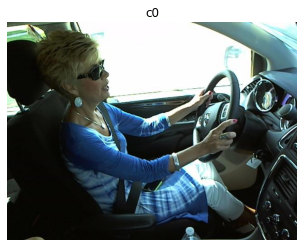

In [17]:
#View a random image from a training dataset
img = visualize_training_image(target_dir="/content/drive/MyDrive/Driver_distraction/imgs/train/",target_class="c0")



# Creating a Base line model with CNN and Max pooling layer

In this section, we will first load the images from the directory and also going to perform the following steps 

1. Resize the image to 180 X 180 (image height X image width)
2. Create the split of 80:20 i.e 80 % traning data and 20 % test data
3. Create patches of data for training.

We can load the image data from directory using the [tf.keras.utils.image_dataset_from_directory utility](https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory).


A very high lavel architecture of our model will be like this:

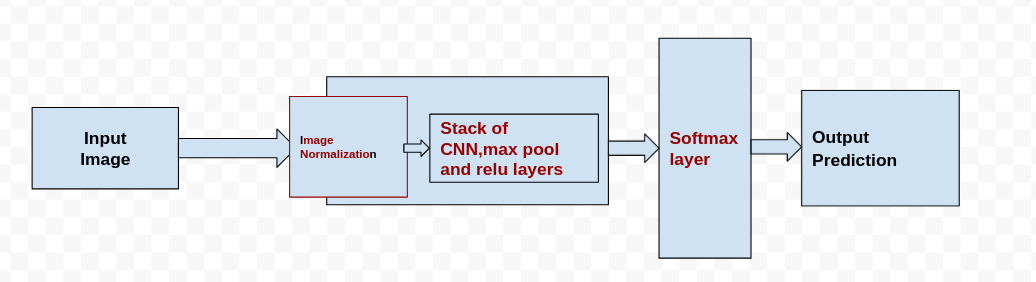


In [18]:
# Defining the parameters for batch size, height and width
batch_size = 32
img_height = 180
img_width = 180

In [19]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,shuffle=True)

Found 22434 files belonging to 10 classes.
Using 17948 files for training.


In [20]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,shuffle=True)

Found 22434 files belonging to 10 classes.
Using 4486 files for validation.


Created the training and validation dataset. There are total 22434 files and out of that 17948 are used for training dataset and 4486 are used for validation dataset 

### Finding out the class names and also printing out the preprocessed images 

In [28]:
class_names = train_ds.class_names
print(class_names)

['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']


In [22]:
class_names_val =val_ds.class_names
class_names_val

['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']

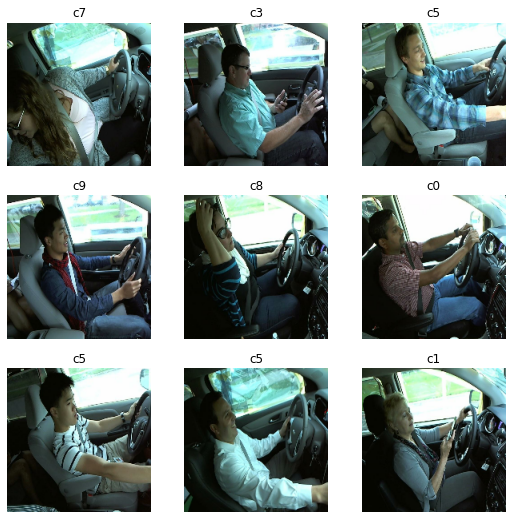

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 9))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### Checking the shapes of the dataset

In [30]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break



(32, 180, 180, 3)
(32,)


We have the shape of the input dataset in the form (batch_size, height,width,channel)
We will normalise the images so that the pixel values lie between 0 and 1.

### Creating the normalization layer

In [34]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [35]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]


Printing the maximum and minimum values of the image

In [36]:
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


###Configure the dataset for performance:

Let's make sure to use buffered prefetching so you can yield data from disk without having I/O become blocking. These are two important methods you should use when loading data:

Dataset.cache keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache.

Dataset.prefetch overlaps data preprocessing and model execution while training

Ref:[Tensorflow tutorial](https://www.tensorflow.org/guide/data_performance)


In [37]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Creating the Network Architecture using sequential api:

The steps for Building the models are 

1. Define the architecture
2. Compile the model
3. Fit the model

In [38]:
num_classes = 10

model_0 = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [39]:
model_0.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [47]:
model_0.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 32)        0

In [41]:
history_0 = model_0.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
561/561 [==============================] - 1787s 3s/step - loss: 0.5507 - accuracy: 0.8174 - val_loss: 0.0930 - val_accuracy: 0.9746
Epoch 2/10
561/561 [==============================] - 8s 14ms/step - loss: 0.0475 - accuracy: 0.9865 - val_loss: 0.0425 - val_accuracy: 0.9886
Epoch 3/10
561/561 [==============================] - 8s 14ms/step - loss: 0.0291 - accuracy: 0.9913 - val_loss: 0.0460 - val_accuracy: 0.9893
Epoch 4/10
561/561 [==============================] - 8s 14ms/step - loss: 0.0201 - accuracy: 0.9934 - val_loss: 0.0342 - val_accuracy: 0.9922
Epoch 5/10
561/561 [==============================] - 8s 14ms/step - loss: 0.0162 - accuracy: 0.9949 - val_loss: 0.0527 - val_accuracy: 0.9882
Epoch 6/10
561/561 [==============================] - 8s 14ms/step - loss: 0.0081 - accuracy: 0.9979 - val_loss: 0.0764 - val_accuracy: 0.9799
Epoch 7/10
561/561 [==============================] - 8s 14ms/step - loss: 0.0095 - accuracy: 0.9972 - val_loss: 0.0529 - val_accuracy: 0.987

### Evaluating the model:

There are number of ways to evaluate the model. We used accuracy during training.
But as it is multiclass classification we can use other classification metrics like precission, recall and F1score also.
For the time being, we are going to plot the training curves.


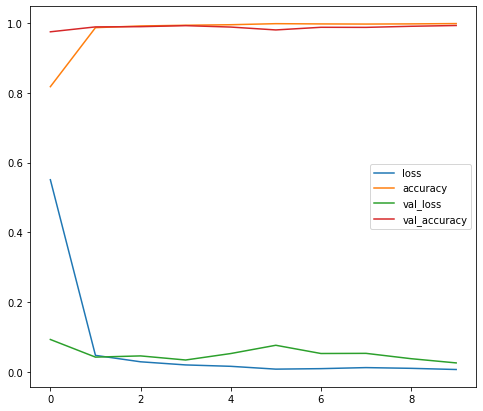

In [43]:
import pandas as pd

pd.DataFrame(history_0.history).plot(figsize=(8,7))

We have our loss curv merging towards downward direction and also accuracy for both training and validation are going up. Visualizing both the curves in one graph is bit challenging.In the next section, we are going to split the curves.

In [44]:
def plot_loss_curve(history):

  """
  This function will return two plot- accuracy plot for traning and validation 
  and also 
  -loss curves for training and validation """

  training_loss = history.history["loss"]
  validation_loss = history.history["val_loss"]

  training_accuracy = history.history["accuracy"]
  validation_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # How many epochs the model is trained for

  # Plot the following curves 

  # Plot loss 
  plt.plot(epochs,training_loss,label="training_loss")
  plt.plot(epochs,validation_loss,label="validation_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy 
  plt.figure()
  plt.plot(epochs,training_accuracy,label="training_accuracy")
  plt.plot(epochs,validation_accuracy,label="validation_accuracy")
  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.legend()






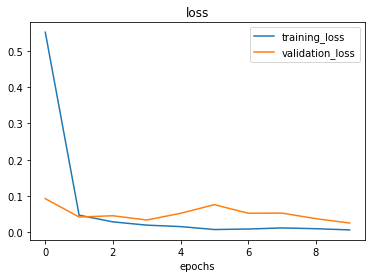

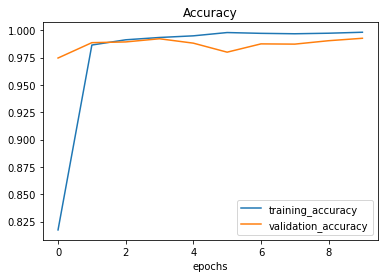

In [45]:
plot_loss_curve(history=history_0)

In [46]:
# Saving and loading the model for use in external application 

model_0.save("/content/drive/MyDrive/Driver_distraction/models/base_line_model_0")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Driver_distraction/models/base_line_model_0/assets


In [48]:
loaded_model_0 = tf.keras.models.load_model("/content/drive/MyDrive/Driver_distraction/models/base_line_model_0")

In [51]:
#Evaluate loaded model and compare performance to save models

loaded_model_0_results = model_0.evaluate(val_ds)

141/141 [==============================] - 1s 6ms/step - loss: 0.0259 - accuracy: 0.9926


In [52]:
pred_probs = model_0.predict(val_ds,verbose=1)

141/141 [==============================] - 1s 4ms/step


In [53]:
len(val_ds)

141

In [54]:
pred_probs.shape

(4486, 10)

In [55]:
len(pred_probs)

4486

In [56]:
#Lets explore what the first 10 looks like

pred_probs[:10]

array([[  5.2644954 ,   0.5761965 ,  -1.663494  ,  25.417358  ,
         14.776936  ,   6.438837  ,  -4.4545503 , -12.807929  ,
        -16.858597  ,   1.4155204 ],
       [ 27.91779   ,   3.9996202 ,   0.827491  ,   1.0937039 ,
          3.141916  ,   3.5370436 , -14.841615  , -11.091723  ,
         -7.722178  ,   8.960576  ],
       [ -3.012989  ,  -5.571649  ,   1.2291838 , -10.864811  ,
         -0.567981  ,   5.042141  ,  27.444185  ,   0.5929235 ,
          0.34090203,  -1.8022851 ],
       [ -5.017736  ,  -4.6755676 ,  -5.6589503 ,  -1.9437113 ,
         -0.5847981 ,  -3.7234383 ,  -9.925101  ,   0.20365657,
         17.03965   ,   9.1145525 ],
       [-13.19987   ,  -2.9062774 ,   5.419823  ,  -3.4004207 ,
          0.9951966 ,   1.992668  ,   6.4739437 ,  26.622002  ,
         -8.499573  ,  -4.1660976 ],
       [  8.416194  ,  -7.991971  ,   0.09291594,   4.3651085 ,
          5.770364  ,  26.606197  ,  -5.519328  ,  -3.9354844 ,
        -12.624157  ,   3.2276769 ],
       [  

Our model predicts 10 probabilities and each values is correspondng to a perticular class. The class containing the highest probability will be the predicted  class of the model. 

In [57]:
# Let us print what comes out of my model: We will use the first sample to understand this

print(f"The length of the pred_probs sample 0 is {len(pred_probs[0])} ")
print(f"How it looks : \n {pred_probs[0]}")
print(f"What is the class it is going to predict : {pred_probs[0].argmax()}")



The length of the pred_probs sample 0 is 10 
How it looks : 
 [  5.2644954   0.5761965  -1.663494   25.417358   14.776936    6.438837
  -4.4545503 -12.807929  -16.858597    1.4155204]
What is the class it is going to predict : 3


In [58]:
# https://stackoverflow.com/questions/62436302/extract-target-from-tensorflow-prefetchdataset
def get_labels_from_tfdataset(tfdataset, batched=False):

    labels = list(map(lambda x: x[1], tfdataset)) # Get labels 

    if not batched:
        return tf.concat(labels, axis=0) # concat the list of batched labels

    return labels

In [59]:
val_labels= get_labels_from_tfdataset(val_ds)

In [60]:
len(val_labels)

4486

In [61]:
y_labels= val_labels[:10]
y_labels

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([3, 0, 6, 8, 7, 5, 2, 5, 9, 1], dtype=int32)>

In [62]:
pred_classes = pred_probs.argmax(axis=1)

In [63]:
pred_classes[:10]

array([3, 0, 6, 8, 7, 5, 2, 5, 9, 1])

Now to compare our model with the predicted classes of our model, we need to compare the predicted class of the model with ground truth of the validation data. How to do that we will find in the subsequent cells

In [65]:
# Let try Scikit learns accuracy 

from sklearn.metrics import accuracy_score

sklearn_accuracy = accuracy_score(y_true=val_labels,y_pred=pred_classes )

sklearn_accuracy

0.992643780650914

In [66]:
!wget https://raw.githubusercontent.com/joydeep03564/Machine_Learning-/master/helper_functions.py

--2021-10-09 10:56:09--  https://raw.githubusercontent.com/joydeep03564/Machine_Learning-/master/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4021 (3.9K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   3.93K  --.-KB/s    in 0s      

2021-10-09 10:56:09 (49.3 MB/s) - ‘helper_functions.py’ saved [4021/4021]



In [67]:
class_names_val



['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']

In [68]:
from helper_functions import make_confusion_matrix


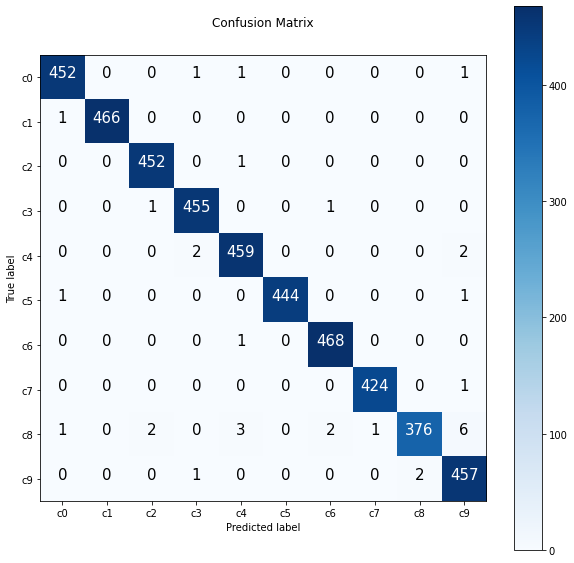

In [69]:
make_confusion_matrix(y_true=val_labels,y_pred=pred_classes,classes=class_names)

In [76]:
from sklearn.metrics import classification_report

print(classification_report(y_true=val_labels,y_pred=pred_classes,output_dict=Flase))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       455
           1       1.00      1.00      1.00       467
           2       0.99      1.00      1.00       453
           3       0.99      1.00      0.99       457
           4       0.99      0.99      0.99       463
           5       1.00      1.00      1.00       446
           6       0.99      1.00      1.00       469
           7       1.00      1.00      1.00       425
           8       0.99      0.96      0.98       391
           9       0.98      0.99      0.98       460

    accuracy                           0.99      4486
   macro avg       0.99      0.99      0.99      4486
weighted avg       0.99      0.99      0.99      4486



c1: texting - right

c2: talking on the phone - right

c3: texting - left

c4: talking on the phone - left

c5: operating the radio

c6: drinking

c7: reaching behind

c8: hair and makeup

c9: talking to passenger

The below code will create a dictionary with class label as the key and its F1,precission and recall.

In [85]:
from sklearn.metrics import classification_report

classification_report_dict = classification_report(y_true=val_labels,y_pred=pred_classes,output_dict=True)
print(classification_report_dict)

{'0': {'precision': 0.9934065934065934, 'recall': 0.9934065934065934, 'f1-score': 0.9934065934065934, 'support': 455}, '1': {'precision': 1.0, 'recall': 0.9978586723768736, 'f1-score': 0.9989281886387995, 'support': 467}, '2': {'precision': 0.9934065934065934, 'recall': 0.9977924944812362, 'f1-score': 0.9955947136563877, 'support': 453}, '3': {'precision': 0.9912854030501089, 'recall': 0.9956236323851203, 'f1-score': 0.9934497816593886, 'support': 457}, '4': {'precision': 0.9870967741935484, 'recall': 0.9913606911447084, 'f1-score': 0.9892241379310344, 'support': 463}, '5': {'precision': 1.0, 'recall': 0.9955156950672646, 'f1-score': 0.9977528089887641, 'support': 446}, '6': {'precision': 0.9936305732484076, 'recall': 0.997867803837953, 'f1-score': 0.9957446808510638, 'support': 469}, '7': {'precision': 0.9976470588235294, 'recall': 0.9976470588235294, 'f1-score': 0.9976470588235294, 'support': 425}, '8': {'precision': 0.9947089947089947, 'recall': 0.9616368286445013, 'f1-score': 0.977

In [86]:
class_names

['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']

In [87]:
#Now we are going to iteriate throught this dictionary

class_f1_score ={}

for k,v in classification_report_dict.items():
  if k == "accuracy": # stop once we reach to accuracy
    break
  else:
   class_f1_score[class_names[int(k)]] = v["f1-score"] 
class_f1_score


{'c0': 0.9934065934065934,
 'c1': 0.9989281886387995,
 'c2': 0.9955947136563877,
 'c3': 0.9934497816593886,
 'c4': 0.9892241379310344,
 'c5': 0.9977528089887641,
 'c6': 0.9957446808510638,
 'c7': 0.9976470588235294,
 'c8': 0.9778933680104032,
 'c9': 0.9849137931034483}

In [97]:
import pandas as pd 

f1_scores = pd.DataFrame({"class_names": list(class_f1_score.keys()),"f1-score" : list(class_f1_score.values())}).sort_values("f1-score",ascending=False)

In [99]:
f1_scores

,class_names,f1-score
1,c1,0.998928
5,c5,0.997753
7,c7,0.997647
6,c6,0.995745
2,c2,0.995595
3,c3,0.993450
0,c0,0.993407
4,c4,0.989224
9,c9,0.984914
8,c8,0.977893


Text(0.5, 1.0, 'F1-Scores for 10 class')

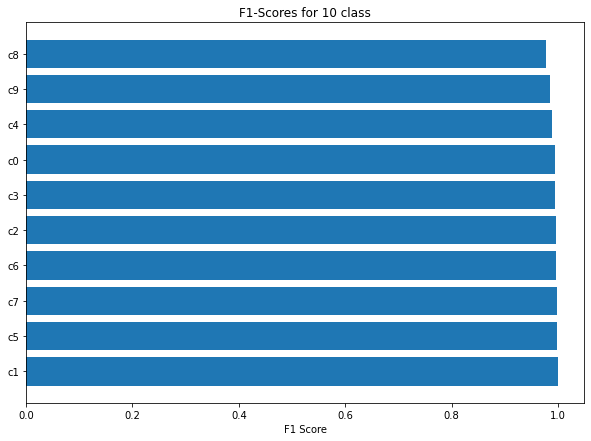

In [107]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,7))
scores = ax.barh(range(len(f1_scores)),f1_scores['f1-score'].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(f1_scores["class_names"])
ax.set_xlabel("F1 Score")
ax.set_title("F1-Scores for 10 class")